In [223]:
import pandas as pd
import re
# Tutorial about Python regular expressions: https://pymotw.com/2/re/
import string
from nltk.corpus import stopwords
import tqdm
from bs4 import BeautifulSoup
from tqdm import tqdm
import numpy as np

## Data Pre-Processing

In [224]:
data = pd.read_csv('tweets-dataset.csv')

In [225]:
data.columns

Index(['Sentence'], dtype='object')

In [226]:
data.head()

,Sentence
0,"@BubblyDentist @MeetUunngLee nahi nahi, mere s..."
1,going to the grammys first entertainment law b...
2,bohot hi badiya ji aap sunao?
3,Parvez Musharraf is Digvijay Singh of Pakistan...
4,guddu ko bass john cena k sticker ki padii hai...


In [227]:
data['text'] = data['Sentence'].values

In [228]:
final = data

In [229]:
# reference: https://stackoverflow.com/a/47091490/4084039
import re

def decontracted(phrase):
    # specific
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

In [230]:
final_data = []
# tqdm is for printing the status bar
for sentance in tqdm(final['text'].values):
    sentance = re.sub(r"http\S+", "", sentance)
    sentance = BeautifulSoup(sentance, 'lxml').get_text()
    sentance = decontracted(sentance)
    sentance = re.sub("\S*\d\S*", "", sentance).strip()
    sentance = re.sub('[^A-Za-z]+', ' ', sentance)
    # https://gist.github.com/sebleier/554280
    sentance = ' '.join(e.lower() for e in sentance.split())
    final_data.append(sentance.strip())

100%|██████████████████████████████████████████████████████████████████████████| 24521/24521 [00:05<00:00, 4647.68it/s]


In [231]:
print("First data point before data cleaning :")
print(data.values[0][0])
print("=============================================")
print("First data point after data cleaning:")
final_data[0]

First data point before data cleaning :
@BubblyDentist @MeetUunngLee nahi nahi, mere saath jaakar pachtaogi. Ye Uunnglee is the best. All girls say that
First data point after data cleaning:


'bubblydentist meetuunnglee nahi nahi mere saath jaakar pachtaogi ye uunnglee is the best all girls say that'

In [232]:
## counting number of tokens and type of token:
type_count = 0
word_count = 0
dictionary = {}
for d_point in final_data:
    x = d_point.split()
    for d in x:
        if d not in dictionary.keys():
            type_count = type_count+1
            dictionary[d] = 1
        else:
            dictionary[d] = dictionary[d]+1
        word_count = word_count+1        

## Ans 1 calculate TTR

In [233]:
TTR = type_count/word_count

In [234]:
print("Total Number of Tokens in the Dataset :",word_count)
print("No of Type of Tokens in the Dataset: ",type_count)
print("TTR values for the entire dataset:",TTR)

Total Number of Tokens in the Dataset : 310416
No of Type of Tokens in the Dataset:  34984
TTR values for the entire dataset: 0.11270037626926448


## ANS 2 Zipf's law for meaning and length

In [235]:
from nltk.corpus import wordnet
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\karan\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [236]:
final_data[22000]

'ye bina peeye bhi aise hote hai kaafi dekhe hai aur woh bada problem hai'

In [237]:
word = ['love','got','complete','know','suicide','sorry','spam','attack','underwear','delete','tweet','original','problem','is',]
d_word = {}
frequency = []
for w in word:
    syns = wordnet.synsets(w)
    print(w+"----->",syns)
    print("==================================================")
    d_word[w] = len(syns)
    frequency.append(dictionary[w])

love-----> [Synset('love.n.01'), Synset('love.n.02'), Synset('beloved.n.01'), Synset('love.n.04'), Synset('love.n.05'), Synset('sexual_love.n.02'), Synset('love.v.01'), Synset('love.v.02'), Synset('love.v.03'), Synset('sleep_together.v.01')]
got-----> [Synset('get.v.01'), Synset('become.v.01'), Synset('get.v.03'), Synset('receive.v.02'), Synset('arrive.v.01'), Synset('bring.v.04'), Synset('experience.v.03'), Synset('pay_back.v.02'), Synset('have.v.17'), Synset('induce.v.02'), Synset('get.v.11'), Synset('grow.v.08'), Synset('contract.v.04'), Synset('get.v.14'), Synset('make.v.02'), Synset('drive.v.11'), Synset('catch.v.18'), Synset('catch.v.07'), Synset('get.v.19'), Synset('get.v.20'), Synset('get.v.21'), Synset('get.v.22'), Synset('catch.v.21'), Synset('catch.v.22'), Synset('get.v.25'), Synset('scram.v.01'), Synset('get.v.27'), Synset('get.v.28'), Synset('get.v.29'), Synset('catch.v.24'), Synset('draw.v.15'), Synset('get.v.32'), Synset('perplex.v.01'), Synset('get_down.v.07'), Synset('

In [238]:
length = [len(x) for x in word ]

In [239]:
d_word

{'love': 10,
 'got': 36,
 'complete': 10,
 'know': 12,
 'suicide': 2,
 'sorry': 4,
 'spam': 3,
 'attack': 15,
 'underwear': 1,
 'delete': 3,
 'tweet': 3,
 'original': 6,
 'problem': 3,
 'is': 13}

## relation with length of a word with it's frequency
### for sample words

In [240]:
word = ['love','got','am','go','my','me','can','day','sir','expressions','boy','just','had','has','have','experiencing','isensitivity','even','who','out','help','may','man','fact','now','cup','complete','twitter','will','do','like','a','pic','an','i','to','was','are','the','know','suicide','time','sorry','music','call','comment','devotee','complaint','productive','episode','spam','attack','underwear','delete','tweet','original','problem','is','nitishkanaklivikas']
freq = []
for w in word:
    freq.append(dictionary[w])

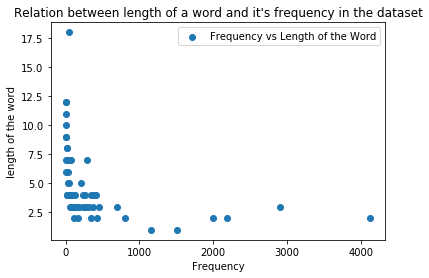

In [241]:
import matplotlib.pyplot as plt
plt.scatter(freq,[len(l) for l in word])
plt.xlabel("Frequency")
plt.ylabel("length of the word")
plt.title("Relation between length of a word and it's frequency in the dataset")
plt.legend(['Frequency vs Length of the Word'])
plt.plot()
plt.show()

### for all the words in the dataset

In [255]:
leng, f = [len(l) for l in dictionary.keys()],[fre for fre in dictionary.values()]

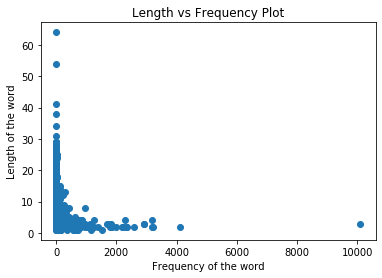

In [259]:
plt.scatter(f,leng)
plt.xlabel("Frequency of the word")
plt.ylabel("Length of the word")
plt.title("Length vs Frequency Plot")
plt.show()

1. As the frequency of the words in the dataset is increasing its length starts decreasing.

## meaning of a word vs frequency of the word 

In [242]:
#word = ['love','got','complete','know','suicide','sorry','spam','attack','underwear','delete','tweet','original','problem','is',]
d_word = {}
frequency = []
for w in word:
    syns = wordnet.synsets(w)
    print(w+"----->",syns)
    print("==================================================")
    d_word[w] = len(syns)
    frequency.append(dictionary[w])

love-----> [Synset('love.n.01'), Synset('love.n.02'), Synset('beloved.n.01'), Synset('love.n.04'), Synset('love.n.05'), Synset('sexual_love.n.02'), Synset('love.v.01'), Synset('love.v.02'), Synset('love.v.03'), Synset('sleep_together.v.01')]
got-----> [Synset('get.v.01'), Synset('become.v.01'), Synset('get.v.03'), Synset('receive.v.02'), Synset('arrive.v.01'), Synset('bring.v.04'), Synset('experience.v.03'), Synset('pay_back.v.02'), Synset('have.v.17'), Synset('induce.v.02'), Synset('get.v.11'), Synset('grow.v.08'), Synset('contract.v.04'), Synset('get.v.14'), Synset('make.v.02'), Synset('drive.v.11'), Synset('catch.v.18'), Synset('catch.v.07'), Synset('get.v.19'), Synset('get.v.20'), Synset('get.v.21'), Synset('get.v.22'), Synset('catch.v.21'), Synset('catch.v.22'), Synset('get.v.25'), Synset('scram.v.01'), Synset('get.v.27'), Synset('get.v.28'), Synset('get.v.29'), Synset('catch.v.24'), Synset('draw.v.15'), Synset('get.v.32'), Synset('perplex.v.01'), Synset('get_down.v.07'), Synset('

complete-----> [Synset('complete.v.01'), Synset('complete.v.02'), Synset('dispatch.v.02'), Synset('complete.v.04'), Synset('complete.v.05'), Synset('complete.a.01'), Synset('complete.s.02'), Synset('accomplished.s.01'), Synset('arrant.s.01'), Synset('complete.s.05')]
twitter-----> [Synset('chirrup.n.01'), Synset('chitter.v.01')]
will-----> [Synset('volition.n.01'), Synset('will.n.02'), Synset('will.n.03'), Synset('will.v.01'), Synset('will.v.02'), Synset('bequeath.v.01')]
do-----> [Synset('bash.n.02'), Synset('do.n.02'), Synset('doctor_of_osteopathy.n.01'), Synset('make.v.01'), Synset('perform.v.01'), Synset('do.v.03'), Synset('do.v.04'), Synset('cause.v.01'), Synset('practice.v.01'), Synset('suffice.v.01'), Synset('do.v.08'), Synset('act.v.02'), Synset('serve.v.09'), Synset('do.v.11'), Synset('dress.v.16'), Synset('do.v.13')]
like-----> [Synset('like.n.01'), Synset('like.n.02'), Synset('wish.v.02'), Synset('like.v.02'), Synset('like.v.03'), Synset('like.v.04'), Synset('like.v.05'), Sy

In [243]:
print("No of meaning of the different words available in the data corpus :")
d_word

No of meaning of the different words available in the data corpus :


{'love': 10,
 'got': 36,
 'am': 16,
 'go': 35,
 'my': 0,
 'me': 1,
 'can': 8,
 'day': 10,
 'sir': 2,
 'expressions': 9,
 'boy': 4,
 'just': 10,
 'had': 19,
 'has': 20,
 'have': 20,
 'experiencing': 5,
 'isensitivity': 0,
 'even': 14,
 'who': 1,
 'out': 17,
 'help': 12,
 'may': 2,
 'man': 13,
 'fact': 4,
 'now': 8,
 'cup': 11,
 'complete': 10,
 'twitter': 2,
 'will': 6,
 'do': 16,
 'like': 11,
 'a': 7,
 'pic': 2,
 'an': 1,
 'i': 4,
 'to': 0,
 'was': 14,
 'are': 14,
 'the': 0,
 'know': 12,
 'suicide': 2,
 'time': 15,
 'sorry': 4,
 'music': 5,
 'call': 41,
 'comment': 6,
 'devotee': 1,
 'complaint': 5,
 'productive': 4,
 'episode': 4,
 'spam': 3,
 'attack': 15,
 'underwear': 1,
 'delete': 3,
 'tweet': 3,
 'original': 6,
 'problem': 3,
 'is': 13,
 'nitishkanaklivikas': 0}

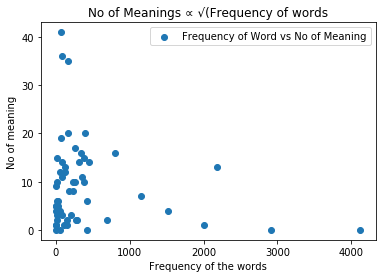

In [244]:
plt.scatter(frequency,[d for d in d_word.values()],)
plt.title('No of Meanings ∝ √(Frequency of words')
plt.ylabel("No of meaning")
plt.xlabel("Frequency of the words")
plt.legend(['Frequency of Word vs No of Meaning'])

### For all the words in the dataset

In [260]:
meaning = []
for w1 in dictionary.keys():
    syns = wordnet.synsets(w1)
    #print(w+"----->",syns)
    #print("==================================================")
    #d_word[w] = len(syns)
    meaning.append(len(syns))

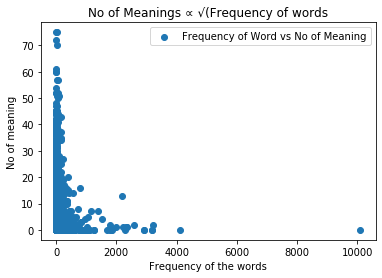

In [263]:
plt.scatter([fre for fre in dictionary.values()],meaning)
plt.title('No of Meanings ∝ √(Frequency of words')
plt.ylabel("No of meaning")
plt.xlabel("Frequency of the words")
plt.legend(['Frequency of Word vs No of Meaning'])

### ANS 3 Heap's Law

In [245]:
tokens = []
vocab = []
dict1 = {}
v_count = 0
token_c = 0
for w in final_data:
    for word in w.split():
        token_c = token_c+1
        if word not in dict1.keys():
            dict1[word] = 1
            v_count = v_count+1
    tokens.append(token_c)
    vocab.append(v_count)

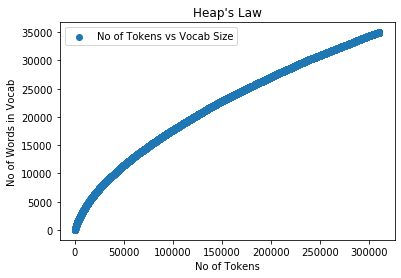

In [246]:
plt.scatter(tokens,vocab)
plt.xlabel("No of Tokens")
plt.ylabel("No of Words in Vocab")
plt.title("Heap's Law")
plt.legend(['No of Tokens vs Vocab Size'])
plt.show()

1. From the above plot we can say initially as the number of tokens increases, vocabulary size increases at a fast rate but after sometime its rate decreases as the number of tokens in the dataset increases.

In [247]:
slope, intercept = np.polyfit(np.array(tokens), np.array(vocab), 1)

In [215]:
print("Value of the slope: ",slope)
print("Value of Intercept Term :",intercept)

Value of the slope:  0.09925453130513372
Value of Intercept Term : 6469.818101984001


In [248]:
##fit the dataset using a polynomial
slope, intercept = np.polyfit(np.log(tokens), np.log(vocab), 1)

In [249]:
print("Value of the slope: ",slope)
print("Value of Intercept Term :",intercept)

Value of the slope:  0.6556903619919037
Value of Intercept Term : 2.211884513651727
